In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/mp 1/apple_quality.csv')
df

Mounted at /content/drive


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
df.isna().sum()

,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


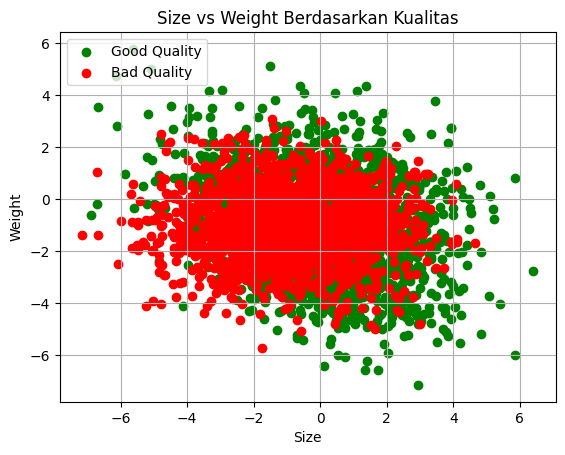

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
good_data = df[df['Quality'] == 'good']
bad_data = df[df['Quality'] == 'bad']
ax.scatter(good_data['Size'], good_data['Weight'], label='Good Quality', color='green')
ax.scatter(bad_data['Size'], bad_data['Weight'], label='Bad Quality', color='red')

plt.title('Size vs Weight Berdasarkan Kualitas')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

X_train = np.array(df[['Size', 'Weight']])
y_train = np.array(df['Quality'])
print(f'X_train:\n{X_train}\n')
print(f'y_train:\n{y_train}')

X_train:
[[-3.97004852 -2.51233638]
 [-1.19521719 -2.83925653]
 [-0.29202386 -1.35128199]
 ...
 [-2.6345153  -2.13824672]
 [-4.00800374 -1.77933711]
 [ 0.27853965 -1.71550503]]

y_train:
['good' 'good' 'bad' ... 'bad' 'good' 'good']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 1 0 ... 0 1 1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K = 10
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
size_baru = 3.0
weight_baru = 1.364217

X_new = np.array([size_baru, weight_baru]).reshape(1, -1)
print(f'X_new:\n{X_new}')

X_new:
[[3.       1.364217]]


In [ ]:
y_new = model.predict(X_new)
print(f'Prediksi untuk data baru: {y_new}')

Prediksi untuk data baru: [0]


In [ ]:
y_new_label = lb.inverse_transform(y_new)
print(f'Prediksi untuk data baru (label asli): {y_new_label}')

Prediksi untuk data baru (label asli): ['bad']


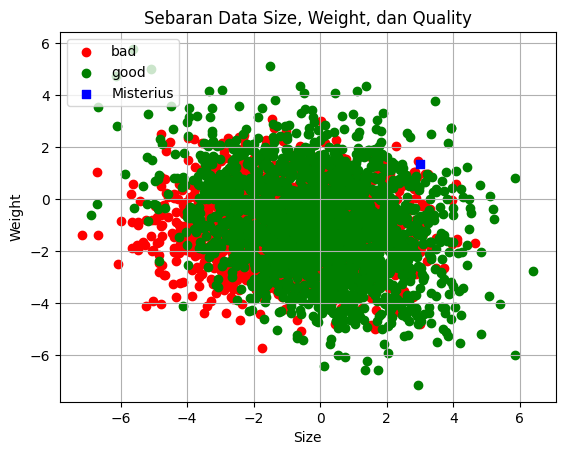

In [ ]:
import matplotlib.pyplot as plt

# Menentukan warna untuk setiap kategori
colors = {
    'good': 'green',
    'bad': 'red'
}

# Membuat plot
fig, ax = plt.subplots()

# Plot data berdasarkan kategori
for quality, d in df.groupby('Quality'):
    ax.scatter(d['Size'], d['Weight'], label=quality, color=colors[quality])

# Titik data baru yang ingin diprediksi
plt.scatter(size_baru, weight_baru,
            marker='s',
            color='blue',  # Warna untuk data baru
            label='Misterius')

# Menambahkan legenda, judul, dan label sumbu
plt.legend(loc='upper left')
plt.title('Sebaran Data Size, Weight, dan Quality')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.grid(True)

# Menampilkan plot
plt.show()


In [ ]:
data_baru = np.array([size_baru, weight_baru])
print(f'Data Baru:\n{data_baru}')

Data Baru:
[3.       1.364217]


In [ ]:
X_train

array([[-3.97004852, -2.51233638],
       [-1.19521719, -2.83925653],
       [-0.29202386, -1.35128199],
       ...,
       [-2.6345153 , -2.13824672],
       [-4.00800374, -1.77933711],
       [ 0.27853965, -1.71550503]])

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(data_baru, d) for d in X_train]
data_jarak

[7.975540265631978,
 5.93877403007209,
 4.267476525983875,
 5.1569797043575045,
 3.1234271121074677,
 6.998353412515053,
 1.6903790549394395,
 5.307553094849447,
 8.553445269268861,
 4.142853976878768,
 6.303854619995419,
 2.00503119196468,
 4.527312952429327,
 5.273641089144067,
 1.7165276584607063,
 7.024179900258962,
 5.563986510331546,
 6.8121649422847295,
 3.321948005882196,
 5.206508717070161,
 6.85682658177925,
 2.7698425864168796,
 5.802930012945692,
 3.5622951041071356,
 3.7326498929448624,
 6.495589058841639,
 3.7974752187818233,
 1.2174931246499578,
 1.5812323527546746,
 3.599863673075405,
 4.4545036003972935,
 5.749498112862794,
 4.541451347505791,
 4.365852498813,
 4.059718829616571,
 5.502566053416773,
 6.0840424853936,
 3.1447293465301818,
 6.809602939093986,
 4.162660419268185,
 3.340898216148489,
 4.767692892805489,
 6.124377459354765,
 2.275840085769741,
 1.6727818576824045,
 3.283873184390337,
 4.087971464842789,
 4.59816715334229,
 6.3684573317239,
 4.20386945769306

In [ ]:
df['jarak'] = data_jarak
df.sort_values('jarak')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,jarak
1652,1652.0,2.931424,1.486790,-2.565211,2.313374,-3.242974,0.454095,4.815610945,bad,0.140453
2289,2289.0,2.863321,1.064391,-3.840678,-1.371792,4.361908,-1.749734,0.722138309,bad,0.329510
3065,3065.0,2.822069,1.060057,-2.304708,1.450493,0.833521,-0.490623,-1.964758344,bad,0.352382
1497,1497.0,3.166010,0.955333,-1.767522,0.058884,-0.264385,-2.060988,-1.426638729,bad,0.441300
592,592.0,3.200290,0.962163,-0.530071,0.746540,-1.003161,0.450423,2.576949552,good,0.449181
...,...,...,...,...,...,...,...,...,...,...
746,746.0,-5.240767,-4.111890,1.299108,0.157965,4.177133,3.069098,5.136138788,bad,9.894341
1516,1516.0,-6.690121,3.556307,0.164711,0.143442,2.567518,-2.319071,-2.036698853,good,9.934974
2331,2331.0,-6.669725,-1.371586,-0.677897,-1.649712,0.974617,4.214320,-3.649341717,bad,10.049288
2001,2001.0,-6.905803,-0.599815,3.640811,-0.807991,3.090987,-1.912564,-2.135251693,good,10.098631


In [ ]:
X_test = np.array([[1.5, -2.5], [3.0, -1.5], [0.5, -3.0], [2.0, -1.0]])
y_test = lb.transform(np.array(['good', 'bad', 'good', 'bad'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[ 1.5 -2.5]
 [ 3.  -1.5]
 [ 0.5 -3. ]
 [ 2.  -1. ]]

y_test:
[1 0 1 0]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


In [ ]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precision: {prec}')

Precision: 0.6666666666666666


In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


In [ ]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
